# ITMAL Exercise


REVISIONS||
---------||
2018-1219| CEF, initial.                  
2018-0207| CEF, updated.           
2018-0207| CEF, rewritten accuracy paradox section. 
2018-0305| CEF, updated with SHN comments.
2019-0901| CEF, updated for ITMAL v2.
2019-0904| CEF, updated for print-f and added conclusion Q.

## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weight could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{2pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.86/fig 3-2. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/E19_itmal/L02/Figs/performance_metrics.png" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`.

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOLM]).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

Prediction for X_test[15]:  [False]


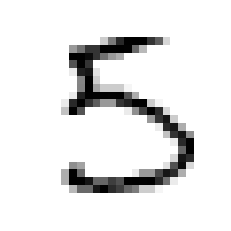

In [10]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np
from IPython.display import Math, display, Latex

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784',return_X_y=True)
X = X / 255.

def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

#Creating the training and test datasets.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Shuffle dataset
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#Creating the binary classifier for 5!
y_train_5 = (y_train == '5')    
y_test_5  = (y_test == '5')

#Create SGD
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_pred5 = sgd_clf.predict(X_test)

#Create Dummy Classifier
class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

#Fit dataset
dum_clf = DummyClassifier()
dum_clf.fit(X_train, y_train_5)

#Predict and print a 5
dum_pred5 = dum_clf.predict(X_test)
print('Prediction for X_test[15]: ',dum_pred5[15])
MNIST_PlotDigit(X_test[15])    


In [2]:
import math 

def getSamples(y_true, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    n = y_true.shape[0]
    assert y_true.shape[0] == y_pred.shape[0]    
    for i in range(n):
        if y_true[i] == True and y_pred[i] == True:
            TP = TP + 1
        elif y_true[i] == True and y_pred[i] == False:
            FN = FN + 1
        elif y_true[i] == False and y_pred[i] == False:
            TN = TN + 1
        else:
            FP = FP + 1
    return TP, TN, FP, FN

def MyAccuracy(y_true, y_pred):
    TP, TN, FP, FN = getSamples(y_true, y_pred)
    cg = TP+TN
    N = TP+TN+FP+FN
    Accuracy = cg/N
    return Accuracy
    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a\t\t={a0}")
    print(f"scikit-learn a\t={a1}")
    if math.fabs(a0-a1)==0:
        print('We have the same accuracy! Hallelujah!')


TestAccuracy(y_test_5,dum_pred5)


my a		=0.9108
scikit-learn a	=0.9108
We have the same accuracy! Hallelujah!


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data.

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

In [3]:
def MyPrecision(y_true, y_pred):
    TP, TN, FP, FN = getSamples(y_true, y_pred)
    cg = TP+TN
    other = TP+FP
    if other == 0:
        print('P: TP + FP is 0')
        return 0
    Precision = TP/other
    if Precision == 0:
        print('P: TP was 0')
    return Precision

def MyRecall(y_true, y_pred):
    TP, TN, FP, FN = getSamples(y_true, y_pred)
    np = TP+FN
    if np == 0:
        print('R: TP+FN was 0')
        return 0
    Recall = TP/np
    if Recall == 0:
        print('R: TP was 0')
    return Recall
    
def MyF1Score(y_true, y_pred):
    r = MyRecall(y_true,y_pred)
    p = MyPrecision(y_true, y_pred)
    t = 2*p*r
    b = p+r
    if b == 0:
        print('F: p+r was 0')
        return 0
    return t/b
    
print('F1 Score for dummy was:', MyF1Score(y_test_5,dum_pred5))
print('F1 Score for SGD was:', MyF1Score(y_test_5,sgd_pred5))

R: TP was 0
P: TP + FP is 0
F: p+r was 0
F1 Score for dummy was: 0
F1 Score for SGD was: 0.8501362397820164


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices
$$
M_{dummy} = \begin{bmatrix}
    \begin{bmatrix}
        18166 & 0
    \end{bmatrix} \newline    
    \begin{bmatrix}
        1834 & 0
    \end{bmatrix}
\end{bmatrix}
$$

And

$$
M_{SDG} = \begin{bmatrix}
    \begin{bmatrix}
        17618 & 548
    \end{bmatrix} \newline    
    \begin{bmatrix}
        267 & 1567 
    \end{bmatrix}
\end{bmatrix}
$$
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

In [55]:
#Matrix conversion tool
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

#Create confusion matix
from sklearn.metrics import confusion_matrix

M_dummy = confusion_matrix(y_test_5,dum_pred5)
M_SGD = confusion_matrix(y_test_5,sgd_pred5)

print('Confusion Matrix for dummy: \n', M_dummy)
print('Confusion Matrix for SGD: \n', M_SGD)


Confusion Matrix for dummy: 
 [[9108    0]
 [ 892    0]]
Confusion Matrix for SGD: 
 [[9065   43]
 [ 188  704]]


In [53]:
#Create fake confusion matrix
print('Confusion Matrix for dummy: \n',confusion_matrix(dum_pred5, y_test_5))
print('Confusion Matrix for SGD: \n',confusion_matrix(sgd_pred5, y_test_5))

Confusion Matrix for dummy: 
 [[9108  892]
 [   0    0]]
Confusion Matrix for SGD: 
 [[9065  188]
 [  43  704]]


Man ved at matrixen er bygget således op: 
[[TN, FP]
 [FN, TP]]
 
Men når man bytter disse rundt, så får man: 
[[TN, FN]
 [FP, TP]]
 
Derfor vil dette godt kunne skabe forvirring, hvis man byttede rundt.

#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.96-97.

This heat map could be an important guide for you when analysing multiclass data in the future.

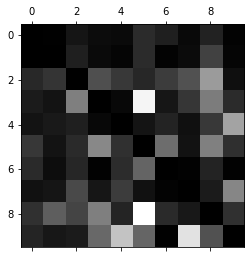

In [80]:
# SKAL VI HAVE DENNE HER???
#TODO: TJEK!

#Lav cross val for sgd_clf
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

y_train_pred_sgd = cross_val_predict(sgd_clf, X_train,y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred_sgd)

#Compare error rates instead of absolute number of errors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#Fill diagonals with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [82]:
#M_dummy
#Compare error rates instead of absolute number of errors
row_sums = M_dummy.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#Fill diagonals with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

ValueError: operands could not be broadcast together with shapes (10,10) (2,1) 

In [ ]:
#M_dummy
#Compare error rates instead of absolute number of errors
row_sums = M_SGD.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#Fill diagonals with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

Der er mange forskellige måder, at en Classifier kan vise sig at være "dårlig" på - men der er også tilfælde, hvor en Classifier kan have en OK succes rate, men reelt set være "dårlig". 
Confusion Matrix, Precision, Accuray og Recall kan her være med til at informere om, hvorhenne at en Classifier er dårlig. 
Confusion matrixen er god til at se mængden af Falske Positiver osv. Denne hjalp fx rigtig meget, da man lavede Dummy Classifier, da man her kan se, at den kun svarer de negative værdier og dermed aldig gætter, at noget er true. Dog så man i "Dummy_Classifier", at den alligevel gætter rigtig i 90% af tiden - fordi 5'erne kun fylder med 10%. 
De andre Precision, Accuracy og Recall kan her også være gode midler til at hjælpe med at spotte netop det område, hvor ens Classifier ikke nødvendigvis er helt så god. 